In [156]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [157]:
churnData=pd.read_csv(r"C:\Users\agata\Documents\GitHub\IronlabAgata\Week 7\DATA_Customer-Churn.csv")

In [158]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [159]:
churnData.isnull().values.any()

False

In [160]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [161]:
churnData["TotalCharges"]=pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [162]:
churnData.iloc[[488]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No


In [163]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [164]:
churnData["TotalCharges"].fillna((churnData["TotalCharges"].mean()), inplace=True)

In [165]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [166]:
X=churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]

In [167]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [168]:
y=churnData["Churn"]

In [169]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [170]:
y = y.apply( lambda x : 1 if x=="Yes" else 0)

In [171]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [172]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [173]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1234)

In [174]:
X_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
3486,47,0,94.80,4535.85
1484,71,1,99.20,7213.75
6102,64,0,85.00,5484.40
651,1,0,74.60,74.60
2178,53,0,19.90,1110.05
...,...,...,...,...
664,57,0,19.50,1167.60
3276,4,0,79.15,317.25
1318,8,0,66.70,579.00
723,3,0,45.35,141.50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002746D479888>,
      dtype=object)

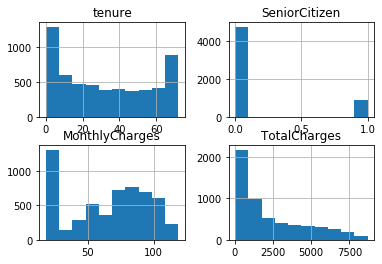

In [175]:
X_train.hist()

In [176]:
from sklearn.preprocessing import PowerTransformer

In [177]:
scaler=PowerTransformer()

In [178]:
X_train_col=X_train.drop(columns="SeniorCitizen")

In [179]:
seniors_train=X_train["SeniorCitizen"]

In [180]:
X_train_col

,tenure,MonthlyCharges,TotalCharges
3486,47,94.80,4535.85
1484,71,99.20,7213.75
6102,64,85.00,5484.40
651,1,74.60,74.60
2178,53,19.90,1110.05
...,...,...,...
664,57,19.50,1167.60
3276,4,79.15,317.25
1318,8,66.70,579.00
723,3,45.35,141.50


In [181]:
scaler.fit(X_train_col)

PowerTransformer()

In [182]:
X_train_col_scaled=scaler.transform(X_train_col)

In [183]:
X_train_col_scaled=pd.DataFrame(X_train_col_scaled, columns=X_train_col.columns, index=X_train.index)

In [184]:
X_test_col=X_test.drop(columns="SeniorCitizen")

In [185]:
X_test_col_scaled=scaler.transform(X_test_col)

In [186]:
X_train_col_scaled["SeniorCitizen"]=X_train["SeniorCitizen"]

In [187]:
X_train_col_scaled

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
3486,0.705676,0.994691,1.052334,0
1484,1.321176,1.134484,1.548953,1
6102,1.155265,0.681414,1.248610,0
651,-1.646668,0.345749,-1.528270,0
2178,0.873150,-1.504987,-0.143748,0
...,...,...,...,...
664,0.979130,-1.519409,-0.107733,0
3276,-1.266894,0.493036,-0.903980,0
1318,-0.927558,0.088271,-0.568715,0
723,-1.374139,-0.620954,-1.280493,0


In [188]:
X_test_col_scaled=pd.DataFrame(X_test_col_scaled, columns=X_test_col.columns, index=X_test.index)

In [189]:
X_test_col_scaled["SeniorCitizen"]=X_test["SeniorCitizen"]

In [190]:
X_test_col_scaled

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
6692,0.526153,0.347371,0.683305,0
2624,-0.394469,0.088271,-0.165034,0
1076,1.004987,-1.340641,0.076626,0
1428,-1.646668,-0.449487,-1.660531,0
7026,-0.856759,-0.659825,-0.776259,0
...,...,...,...,...
5368,-1.374139,0.205890,-1.052030,1
5612,0.647292,-0.047952,0.592794,0
5715,0.227824,1.417319,0.780817,0
3302,0.192015,1.269036,0.676109,0


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() 



log_model.fit(X_train_col_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_col_scaled)
y_pred_test_log = log_model.predict(X_test_col_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.790380,0.790632
1,Precision,0.656400,0.634921
2,Recall,0.452855,0.440771


In [201]:
model = KNeighborsClassifier(n_neighbors=10,weights='uniform') # declare we're using knn classification model
model.fit(X_train_col_scaled, y_train) # train model
y_pred = model.predict(X_test_col_scaled) # predict test
y_pred_train=model.predict(X_train_col_scaled) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.813987,0.768630
1,Precision,0.731781,0.581498
2,Recall,0.480080,0.363636


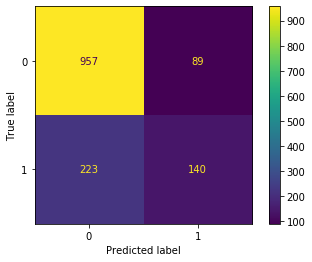

In [198]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()